In [1]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

import gc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
input_parquet_file_path = '../data/interm/4.0_department.parquet'

In [3]:
data_df = pd.read_parquet(input_parquet_file_path)

number_of_departments = 10

# Select the necessary columns
all_columns = data_df.columns.tolist()
tax_columns = data_df.columns[8:]

Top Departments by Total Tax Revenue:
Hauts-de-Seine: 6.4B
Paris: 6.1B
Nord: 2.8B
Bouches-du-Rhône: 2.4B
Yvelines: 2.1B
Seine-Saint-Denis: 2.1B
Haute-Garonne: 2.0B
Gironde: 1.9B
Loire-Atlantique: 1.9B
Val-de-Marne: 1.9B

Bottom Departments by Total Tax Revenue:
Saint Martin: 63.8K
Mayotte: 48.6M
Lozère: 80.8M
Creuse: 136.1M
Hautes-Alpes: 142.4M
Guyane: 151.8M
Ariège: 154.9M
Territoire de Belfort: 160.2M
Alpes-de-Haute-Provence: 192.2M
Haute-Marne: 198.5M


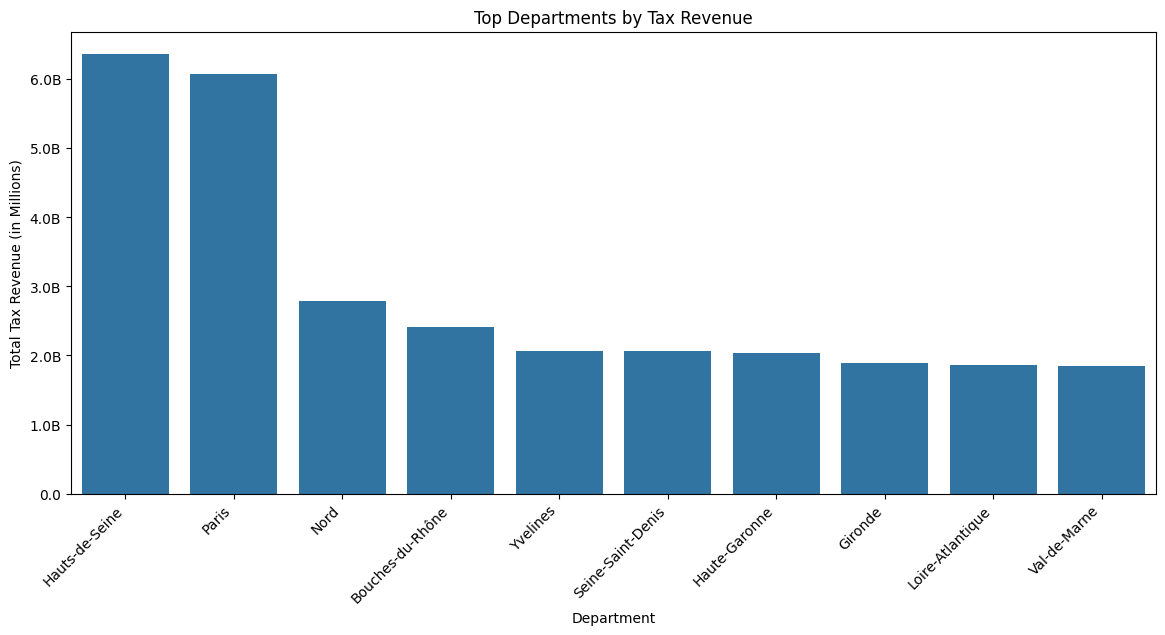

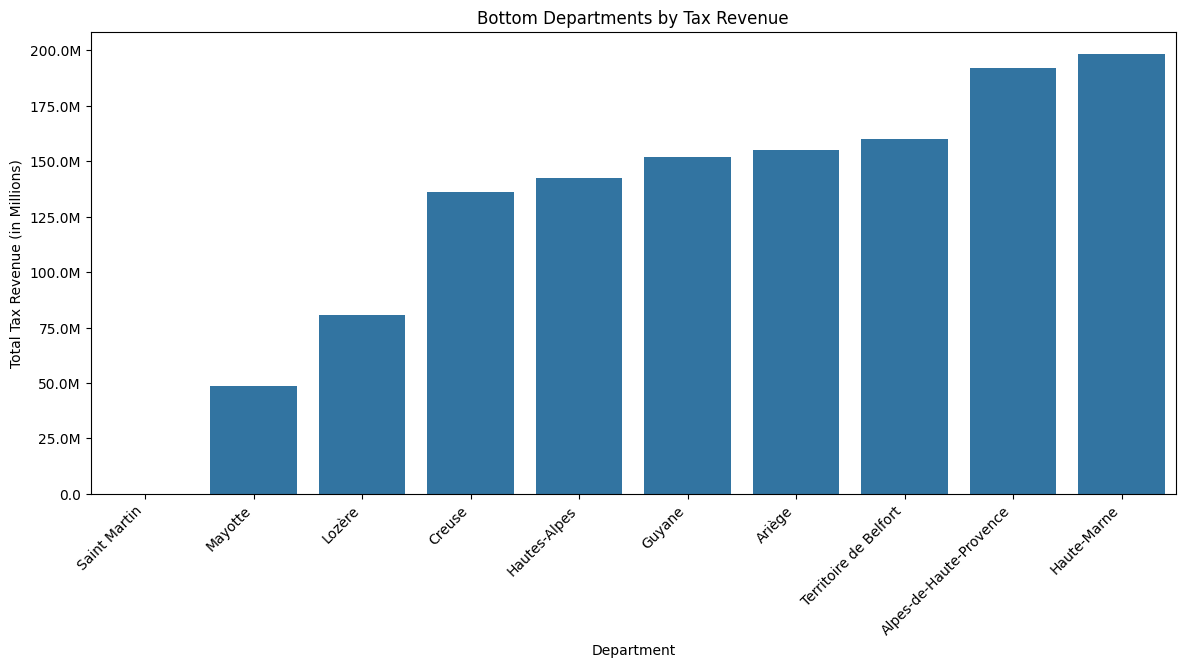

In [4]:
tax_revenue_df = data_df.groupby('DEPARTEMENT').agg(
    {**{col: 'sum' for col in tax_columns}, **{'DEPARTEMENT_LABEL': 'first'}}).reset_index()

# Calculate total tax revenue for each municipality
tax_revenue_df['Total_Tax_Revenue'] = tax_revenue_df[tax_columns].sum(axis=1)

# Rank municipalities based on their total tax revenue
tax_revenue_df['Rank'] = tax_revenue_df['Total_Tax_Revenue'].rank(ascending=False)

# Get top and bottom municipalities
filtered_commune_tax_revenue_df = tax_revenue_df[tax_revenue_df['Total_Tax_Revenue'] != 0]

top_communes = filtered_commune_tax_revenue_df.nsmallest(number_of_departments, 'Rank')
bottom_communes = filtered_commune_tax_revenue_df.nlargest(number_of_departments, 'Rank')

# Define a function to format the y-axis labels to display in millions
def human_readable_format(x, pos=None):
    """
    Converts a number into a human-readable format (K, M, B, T).
    
    Parameters:
    x (float): The number to be converted.
    pos (optional): The position (not used, but required for compatibility with matplotlib).

    Returns:
    str: The human-readable format of the number.
    """
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(x)

print("Top Departments by Total Tax Revenue:")
for index, row in top_communes.iterrows():
    print(f"{row['DEPARTEMENT_LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

# Print bottom municipalities
print("\nBottom Departments by Total Tax Revenue:")
for index, row in bottom_communes.iterrows():
    print(f"{row['DEPARTEMENT_LABEL']}: {human_readable_format(row['Total_Tax_Revenue'])}")

# Plot top municipalities 
plt.figure(figsize=(14, 6))
sns.barplot(data=top_communes, x='DEPARTEMENT_LABEL', y='Total_Tax_Revenue')
plt.title('Top Departments by Tax Revenue')
plt.xlabel('Department')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

# Plot bottom 5 municipalities
plt.figure(figsize=(14, 6))
sns.barplot(data=bottom_communes, x='DEPARTEMENT_LABEL', y='Total_Tax_Revenue')
plt.title('Bottom Departments by Tax Revenue')
plt.xlabel('Department')
plt.ylabel('Total Tax Revenue (in Millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()

In [5]:
del data_df
del tax_revenue_df

gc.collect()

338